In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset shape: (569, 30)
Number of classes: 2


In [11]:
# Example with RandomForestClassifier (has feature_importances_)
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Or with LogisticRegression (has coef_)
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# For tree-based models
rf_rfecv = RFECV(
    estimator=rf_pipeline,
    step=1,
    cv=StratifiedKFold(5, shuffle=True, random_state=42),
    scoring='accuracy',
    min_features_to_select=1,
    importance_getter='named_steps.classifier.feature_importances_',  # Specify path
    n_jobs=-1,
    verbose=1
)

# For linear models
lr_rfecv = RFECV(
    estimator=lr_pipeline,
    step=1,
    cv=StratifiedKFold(5, shuffle=True, random_state=42),
    scoring='accuracy',
    min_features_to_select=1,
    importance_getter=lambda x: x.named_steps.classifier.coef_[0],  # For binary classification
    n_jobs=-1,
    verbose=1
)

# Fit RFECV
print("Fitting RFECV...")
rf_rfecv.fit(X, y)
print()

# Fit RFECV
print("Fitting RFECV...")
lr_rfecv.fit(X, y)

# Get the optimal number of features
n_features_optimal = rf_rfecv.n_features_
print(f"\nOptimal number of features with random forest: {n_features_optimal}")

# Get the optimal number of features
optimal_n_features = lr_rfecv.n_features_
print(f"Optimal number of features with logistic regression: {optimal_n_features}")

Fitting RFECV...
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.

Fitting RFECV...
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.

Optimal number of features with random forest: 17
Optimal number of features with logistic regression: 23


In [13]:
# Get selected feature names
rf_selected_features = [feature_names[i] for i, selected in enumerate(rf_rfecv.support_) if selected]
print("Selected features:")
for rf, rf_feature in enumerate(rf_selected_features):
    print(f"{rf+1}. {rf_feature}")

Selected features:
1. mean radius
2. mean texture
3. mean perimeter
4. mean area
5. mean concavity
6. mean concave points
7. radius error
8. area error
9. worst radius
10. worst texture
11. worst perimeter
12. worst area
13. worst smoothness
14. worst compactness
15. worst concavity
16. worst concave points
17. worst symmetry


In [14]:
# Get selected feature names
lr_selected_features = [feature_names[i] for i, selected in enumerate(lr_rfecv.support_) if selected]
print("Selected features:")
for lr, lr_feature in enumerate(lr_selected_features):
    print(f"{lr+1}. {lr_feature}")

Selected features:
1. mean radius
2. mean texture
3. mean perimeter
4. mean area
5. mean compactness
6. mean concavity
7. mean concave points
8. radius error
9. perimeter error
10. area error
11. smoothness error
12. compactness error
13. symmetry error
14. fractal dimension error
15. worst radius
16. worst texture
17. worst perimeter
18. worst area
19. worst smoothness
20. worst concavity
21. worst concave points
22. worst symmetry
23. worst fractal dimension


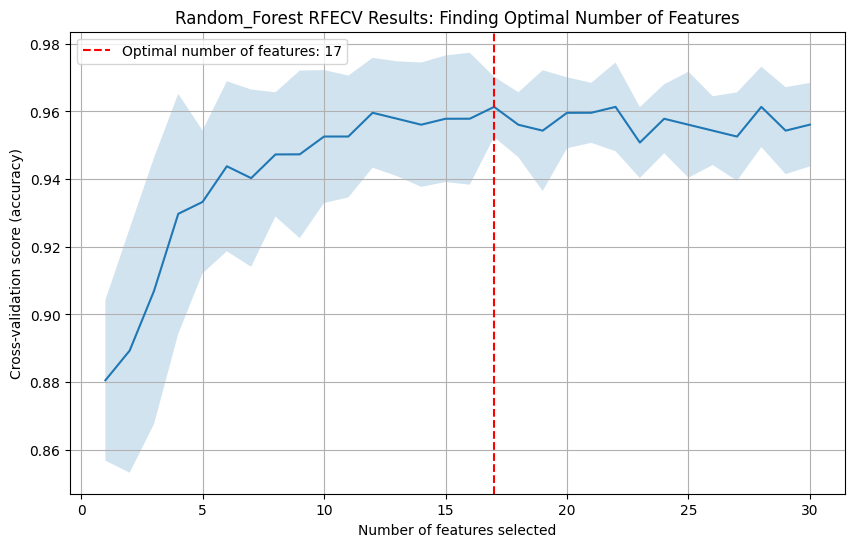

In [18]:
# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(
    range(1, len(rf_rfecv.cv_results_['mean_test_score']) + 1),
    rf_rfecv.cv_results_['mean_test_score']
)
plt.fill_between(
    range(1, len(rf_rfecv.cv_results_['mean_test_score']) + 1),
    rf_rfecv.cv_results_['mean_test_score'] - rf_rfecv.cv_results_['std_test_score'],
    rf_rfecv.cv_results_['mean_test_score'] + rf_rfecv.cv_results_['std_test_score'],
    alpha=0.2
)
plt.axvline(x=n_features_optimal, color='r', linestyle='--', 
            label=f'Optimal number of features: {n_features_optimal}')
plt.legend()
plt.grid(True)
plt.title("Random_Forest RFECV Results: Finding Optimal Number of Features")
plt.show()

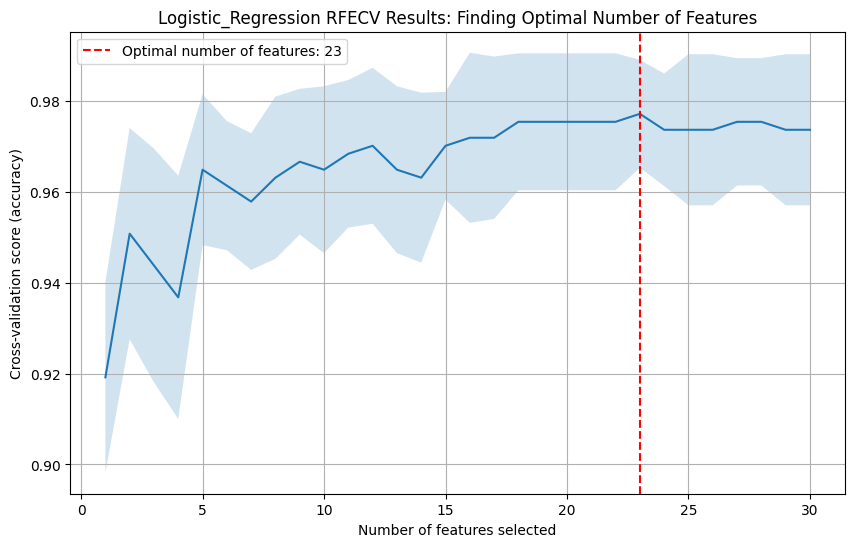

In [19]:
# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(
    range(1, len(lr_rfecv.cv_results_['mean_test_score']) + 1),
    lr_rfecv.cv_results_['mean_test_score']
)
plt.fill_between(
    range(1, len(lr_rfecv.cv_results_['mean_test_score']) + 1),
    lr_rfecv.cv_results_['mean_test_score'] - lr_rfecv.cv_results_['std_test_score'],
    lr_rfecv.cv_results_['mean_test_score'] + lr_rfecv.cv_results_['std_test_score'],
    alpha=0.2
)
plt.axvline(x=optimal_n_features, color='r', linestyle='--', 
            label=f'Optimal number of features: {optimal_n_features}')
plt.legend()
plt.grid(True)
plt.title("Logistic_Regression RFECV Results: Finding Optimal Number of Features")
plt.show()

In [21]:
# Compare performance before and after feature selection
# Using all features
rf_all = RandomForestClassifier(random_state=42)
rf_all.fit(X, y)
rf_y_pred_all = rf_all.predict(X) 
rf_accuracy_all = accuracy_score(y, rf_y_pred_all)

# Using selected features
rf_X_selected = rf_rfecv.transform(X)
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(rf_X_selected, y)
rf_y_pred_selected = rf_selected.predict(rf_X_selected)
rf_accuracy_selected = accuracy_score(y, rf_y_pred_selected)

print(f"\nAccuracy with all features: {rf_accuracy_all:.4f}")
print(f"Accuracy with {n_features_optimal} selected features: {rf_accuracy_selected:.4f}")


Accuracy with all features: 1.0000
Accuracy with 17 selected features: 1.0000


In [26]:
# Compare performance before and after feature selection
# Using all features
lr_all = LogisticRegression(max_iter=10000, random_state=42)
lr_all.fit(X, y)
lr_y_pred_all = lr_all.predict(X) 
lr_accuracy_all = accuracy_score(y, lr_y_pred_all)

# Using selected features
lr_X_selected = lr_rfecv.transform(X)
lr_selected = RandomForestClassifier(random_state=42)
lr_selected.fit(lr_X_selected, y)
lr_y_pred_selected = lr_selected.predict(lr_X_selected)
lr_accuracy_selected = accuracy_score(y, lr_y_pred_selected)

print(f"\nAccuracy with all features: {lr_accuracy_all:.4f}")
print(f"Accuracy with {optimal_n_features} selected features: {lr_accuracy_selected:.4f}")


Accuracy with all features: 0.9578
Accuracy with 23 selected features: 1.0000


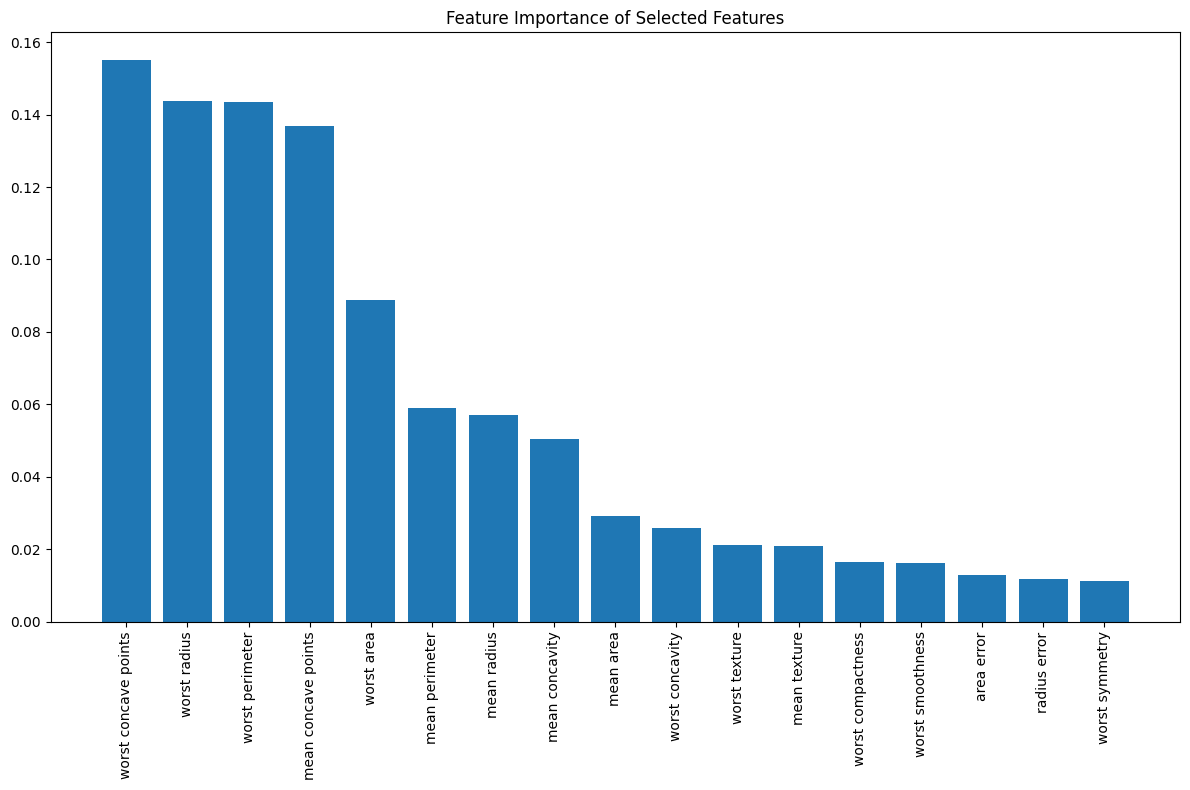

In [33]:
# Feature importance of selected features
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(rf_X_selected, y)

plt.figure(figsize=(12, 8))
rf_importances = rf_selected.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]
rf_selected_names = [rf_selected_features[i] for i in rf_indices]

plt.title('Feature Importance of Selected Features')
plt.bar(range(rf_X_selected.shape[1]), rf_importances[rf_indices])
plt.xticks(range(rf_X_selected.shape[1]), rf_selected_names, rotation=90)
plt.tight_layout()
plt.show()

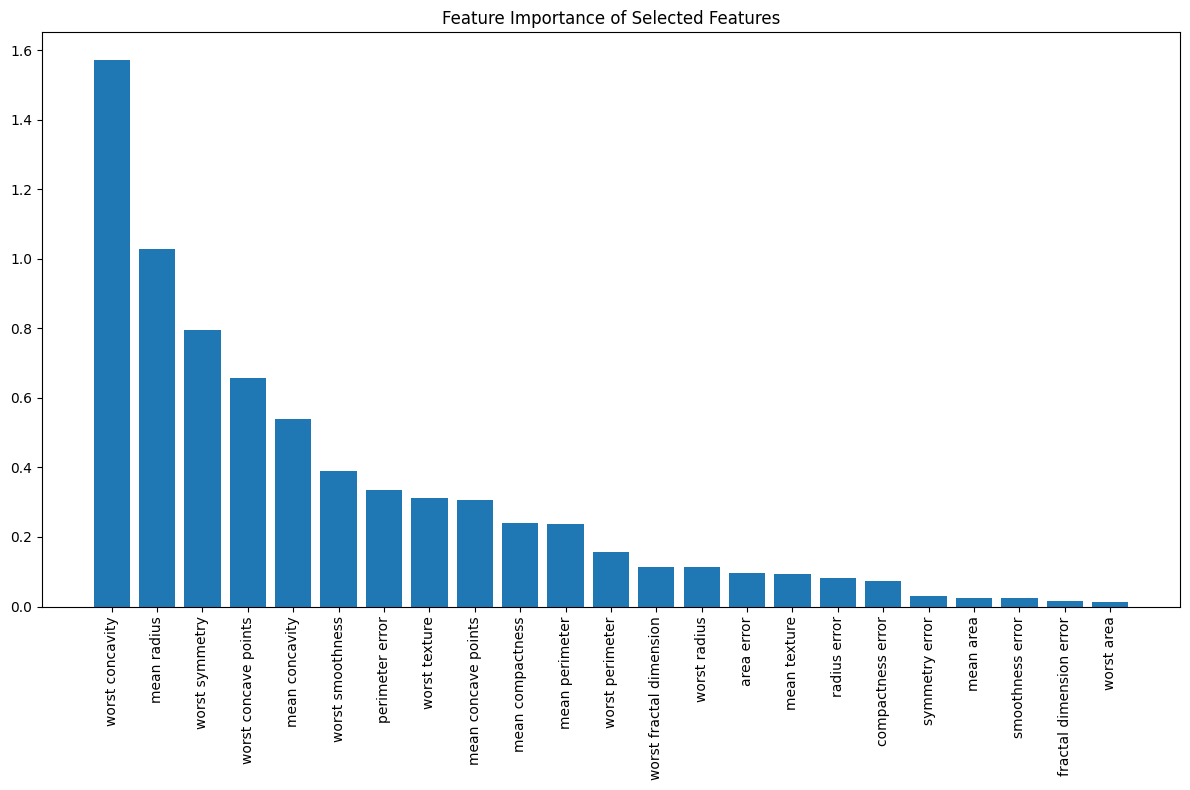

In [37]:
# Feature importance of selected features
lr_selected = LogisticRegression(max_iter=10000, random_state=42)
lr_selected.fit(lr_X_selected, y)

plt.figure(figsize=(12, 8))
lr_importances = np.abs(lr_selected.coef_[0])  # Take absolute values
lr_indices = np.argsort(lr_importances)[::-1]
lr_selected_names = [lr_selected_features[i] for i in lr_indices]

plt.title('Feature Importance of Selected Features')
plt.bar(range(lr_X_selected.shape[1]), lr_importances[lr_indices])
plt.xticks(range(lr_X_selected.shape[1]), lr_selected_names, rotation=90)
plt.tight_layout()
plt.show()